# Training a model with a curated image datasets in fastai
Walkthrough of how to train a deep learning model in fastai with a curated image dataset


In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

# Ingest the dataset
- create a path object
- defined an ImageDataLoaders object

In [3]:
# ingest the curated image dataset FLOWERS
path = untar_data(URLs.CIFAR)

In [4]:
# examine the directory structure of the dataset
path.ls()

(#3) [Path('/storage/data/cifar10/test'),Path('/storage/data/cifar10/train'),Path('/storage/data/cifar10/labels.txt')]

In [5]:
dls = ImageDataLoaders.from_folder(path, train='train', valid='test')

# Examine the dataset

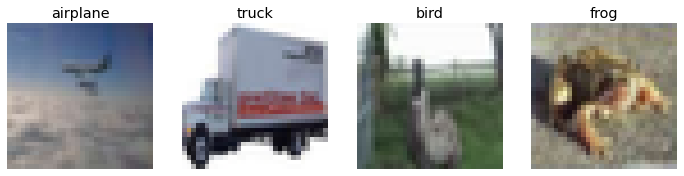

In [6]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


In [7]:
# examine the train subdirectory
(path/'train').ls()

(#10) [Path('/storage/data/cifar10/train/dog'),Path('/storage/data/cifar10/train/automobile'),Path('/storage/data/cifar10/train/frog'),Path('/storage/data/cifar10/train/airplane'),Path('/storage/data/cifar10/train/deer'),Path('/storage/data/cifar10/train/horse'),Path('/storage/data/cifar10/train/cat'),Path('/storage/data/cifar10/train/truck'),Path('/storage/data/cifar10/train/bird'),Path('/storage/data/cifar10/train/ship')]

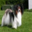

In [8]:
# take a look at one of the images
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

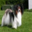

In [9]:
# display a thumbnail of the image
img.to_thumb(180)

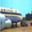

In [10]:
img = PILImage.create(img_files[3000])
img

# Define and train the model

In [11]:
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

In [12]:
%%time
learn.fit_one_cycle(5, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,2.570641,24.103378,0.178800,01:13
1,2.129306,60.954327,0.346800,01:06
2,1.873534,6.247959,0.469500,01:02
3,1.452510,1.690494,0.589600,01:02
4,1.266481,2.036365,0.660400,01:02


CPU times: user 5min 8s, sys: 8.18 s, total: 5min 16s
Wall time: 5min 26s


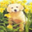

In [13]:
# take a look at one of the test images
img_test_files = get_image_files(path/"test")
img2 = PILImage.create(img_test_files[700])
img2

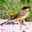

In [14]:
# select an image from the test set
img3 = PILImage.create(img_test_files[8000])
img3

In [15]:
# apply the trained model to the image
learn.predict(img2)

('frog',
 TensorImage(6),
 TensorImage([0.0120, 0.0099, 0.3181, 0.0557, 0.0474, 0.0400, 0.4843, 0.0124, 0.0093, 0.0110]))

In [16]:
# apply the trained model to the image
learn.predict(img3)

('deer',
 TensorImage(4),
 TensorImage([0.0346, 0.0079, 0.0949, 0.0408, 0.7082, 0.0226, 0.0423, 0.0273, 0.0114, 0.0100]))

In [17]:
%%time
# train for some more epochs
learn.fit_one_cycle(10, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.495976,2.860812,0.450800,01:02
1,1.840722,36.175564,0.386700,01:02
2,1.996502,34.617706,0.335700,01:02
3,1.752508,114.803398,0.459600,01:03
4,1.599957,2.425523,0.498900,01:03
5,1.453124,32.906811,0.562700,01:03
6,1.258355,2.992522,0.677000,01:03
7,1.093113,1.548374,0.737900,01:03
8,0.947414,1.960658,0.765100,01:03
9,0.844573,2.221663,0.766800,01:03


In [18]:
# apply the trained model to the image
learn.predict(img2)

('dog',
 TensorImage(5),
 TensorImage([0.0162, 0.0122, 0.0273, 0.0708, 0.0276, 0.5427, 0.2665, 0.0118, 0.0091, 0.0159]))

In [19]:
# apply the trained model to the image
learn.predict(img3)

('bird',
 TensorImage(2),
 TensorImage([0.0275, 0.0135, 0.4332, 0.0315, 0.4264, 0.0119, 0.0162, 0.0132, 0.0103, 0.0163]))